<h1>Analysis of the Iris Dataset</h1>

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
import sklearn.datasets as datasets
df = pd.read_csv("data/iris.csv")

df.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,1,5.1,3.5,1.4,0.2,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,0,Iris-setosa


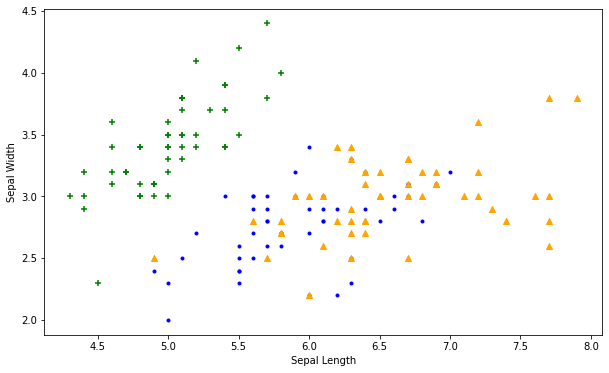

In [213]:
# Plot data for the three diffeent Iris varieties
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
df2 = df[df["target"]==2]

plt.rcParams["figure.figsize"] = (10,6) # Make plots bigger

# Plot Sepal Length vs. Width for the three diffeent Iris varieties
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="orange",marker='^')
plt.show()

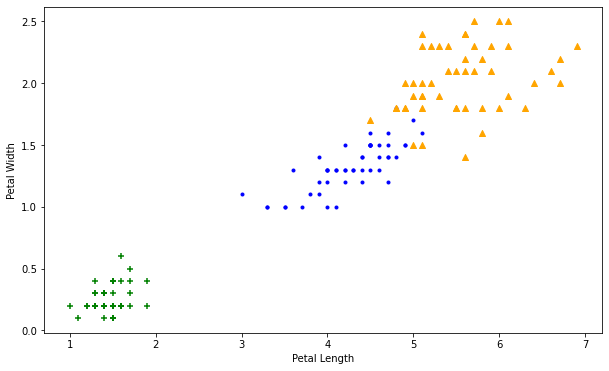

In [215]:
# Plot Petal Length vs. Width for the three diffeent Iris varieties
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="orange",marker='^')

In [258]:
# Performing the classification
from sklearn.model_selection import train_test_split

#Let's create df and series for features and target
df_data = df.drop(['target','species'],axis=1)
df_target = df['target']

#Creating training and test datasets
data_train, data_test, target_train, target_test = train_test_split(df_data, df_target, test_size=0.30, )


In [259]:
# Fit the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train,target_train)


KNeighborsClassifier(n_neighbors=3)

In [260]:
# Create the classification report (calculating accuracy)
from sklearn.metrics import classification_report,confusion_matrix

pred = knn.predict(data_test)
print(classification_report(target_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [261]:
#Choosing the best value for k based on the error rate
error_rate = []
kmax=75
# Test odd numbers between 1 and kmax, odd so no possible "ties" in knn test
for i in range(1,kmax, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train,target_train)
    pred = knn.predict(data_test)
    error_rate.append(np.mean(pred != target_test))

Text(0, 0.5, 'Error Rate')

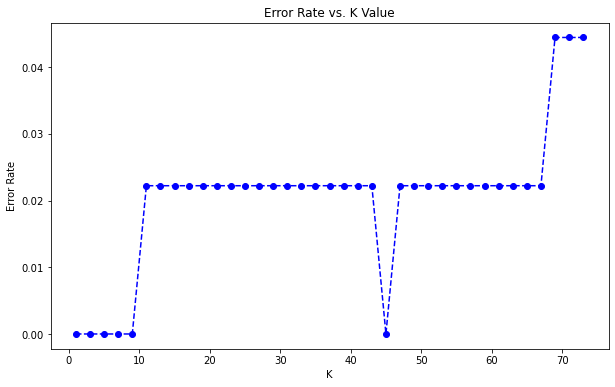

In [262]:
plt.figure(figsize=(10,6))
plt.plot(range(1,kmax, 2),error_rate,color='blue', linestyle='--', marker='o', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [263]:
# Use the value for K that has the lowst error rate AND that is smallest (improves analysis efficiency)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train,target_train)
predict = knn.predict(data_test)
print(classification_report(target_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



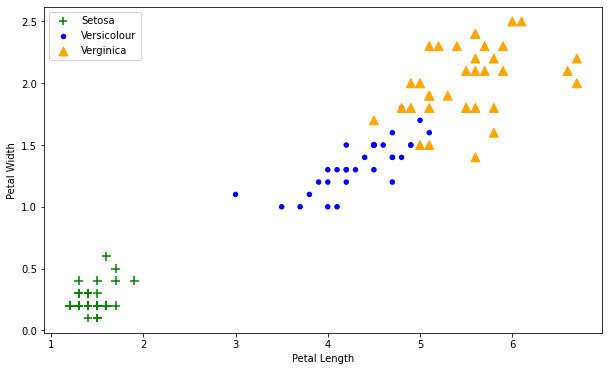

In [264]:
# Plot training data for the three diffeent Iris varieties
df_train = data_train
df_train["target"] = target_train

df_test = data_test
df_test["target"] = target_test

#display(data_test.head(30))
df0 = df_train[df_train["target"]==0]
df1 = df_train[df_train["target"]==1]
df2 = df_train[df_train["target"]==2]

plt.rcParams["figure.figsize"] = (10,6) # Make plots bigger
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+', s=np.ones(len(df0))*80, label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.', s=np.ones(len(df1))*80, label="Versicolour")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="orange",marker='^', s=np.ones(len(df2))*80, label="Verginica")
#plt.scatter(data_test['petal length (cm)'][76], data_test['petal width (cm)'][76], color="purple", marker="x", s=[90], label="Unknown")
plt.legend(loc="upper left")

<hr><h3>Refrences</h3>

<p>Mike Yun, Iris KNN Classification (SciKit), <a href="https://www.kaggle.com/code/barcodereader/iris-knn-classification-scikit">https://www.kaggle.com/code/barcodereader/iris-knn-classification-scikit</a>, Apache 2.0 open source license.</p>
<p>skalskip, Iris data visualization and KNN classification <a href=https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification>https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification</a>, Apache 2.0 open source license.</p>
<p>Images downloaded from: <a href="https://github.com/andersonpereiradossantos/machine-leaning-knn_Iris_dataset">https://github.com/andersonpereiradossantos/machine-leaning-knn_Iris_dataset</a>, MIT License